### Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

emails = pd.read_table("SMSSpamCollection.tsv", encoding="utf-8", sep='\t', names= ['class', 'content'], engine = 'c')
emails.head()

,class,content
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [3]:
emails['class'].value_counts()

ham     4822
spam     746
Name: class, dtype: int64

### Preprocessing Data

In [4]:
### Q1. Preprocess the data so that stopwords are removed
import nltk
# Get stop words list
from nltk.corpus import stopwords
nltk.download('stopwords')

# Perform stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# We can only lowercase and keep punctuation to count it
emails['content'] = emails['content'].str.lower().str.split()
# Or remove numbers/punctuation as well
#emails['content'] = emails['content'].str.lower().str.replace('[^a-z]', ' ').str.split()

# Now we apply stemming and stopwords removal
emails['content'] = emails['content'].apply(lambda x: ' '.join([ps.stem(word) for word in x if word not in set(stopwords.words('english'))]))
emails.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luccl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,class,content
0,ham,i'v search right word thank breather. promis w...
1,spam,free entri 2 wkli comp win fa cup final tkt 21...
2,ham,"nah think goe usf, live around though"
3,ham,even brother like speak me. treat like aid pat...
4,ham,date sunday will!!


In [5]:
### Q2. Write down a function that can count percentage of punctuation marks in the text
import string
# Function to count punctuation mark in message content
count_punctuation = lambda str: sum([1 for x in str if x in string.punctuation])
# Then compute percentage
emails['content_punctuation'] = emails['content'].apply(lambda str: 100 * count_punctuation(str) / len(str))
emails.head()

,class,content,content_punctuation
0,ham,i'v search right word thank breather. promis w...,3.960396
1,spam,free entri 2 wkli comp win fa cup final tkt 21...,4.379562
2,ham,"nah think goe usf, live around though",2.702703
3,ham,even brother like speak me. treat like aid pat...,4.000000
4,ham,date sunday will!!,11.111111


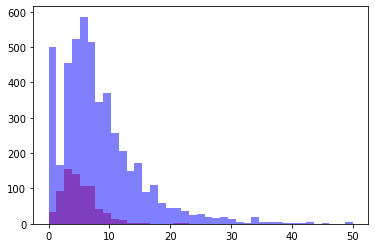

In [13]:
bins = np.linspace(0, 50, 40)
plt.hist(emails[emails['class'] == 'spam']['content_punctuation'], bins, facecolor='r', alpha=0.5, label='spam')
plt.hist(emails[emails['class'] == 'ham']['content_punctuation'], bins, facecolor='b', alpha=0.5, label='ham')
plt.show()

### Split into train/test

In [17]:
### Q3. Split the whole data set into training and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(emails['content'], emails['class'], test_size=0.25, random_state=0)


### Vectorize text

In [33]:
## Q4. For the test and train datasets create a TfIdfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)
#print(vectorizer.vocabulary_.items())
print(X_train_tfidf.shape)
print(X_train_tfidf[1, :])

(4176, 6799)
  (0, 3707)	1.0


### Final evaluation of models

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1190
        spam       0.99      0.83      0.91       202

    accuracy                           0.97      1392
   macro avg       0.98      0.92      0.95      1392
weighted avg       0.98      0.97      0.97      1392



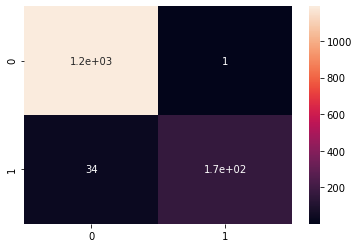

In [36]:
## Q5. Create a Ensemble classifier that can predict if the given Text is a Spam or a Ham
# We can similarly use a 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=5)
model.fit(X_train_tfidf, y_train)
# Predict the outcome for testing data
predictions = model.predict(X_test_tfidf)

## Q6. Evaluate the performance of your model using confusion matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
import seaborn as sn

print(classification_report(y_test, predictions))

matrix = pd.DataFrame(confusion_matrix(y_test, predictions))
sn.heatmap(matrix, annot=True)

In [59]:
# Test the model manually
print(model.predict(vectorizer.transform(['URGENT! Call 0123456789. Claim code S89.'])))
print(model.predict(vectorizer.transform(['I am ready to go'])))

['spam']
['ham']
